In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

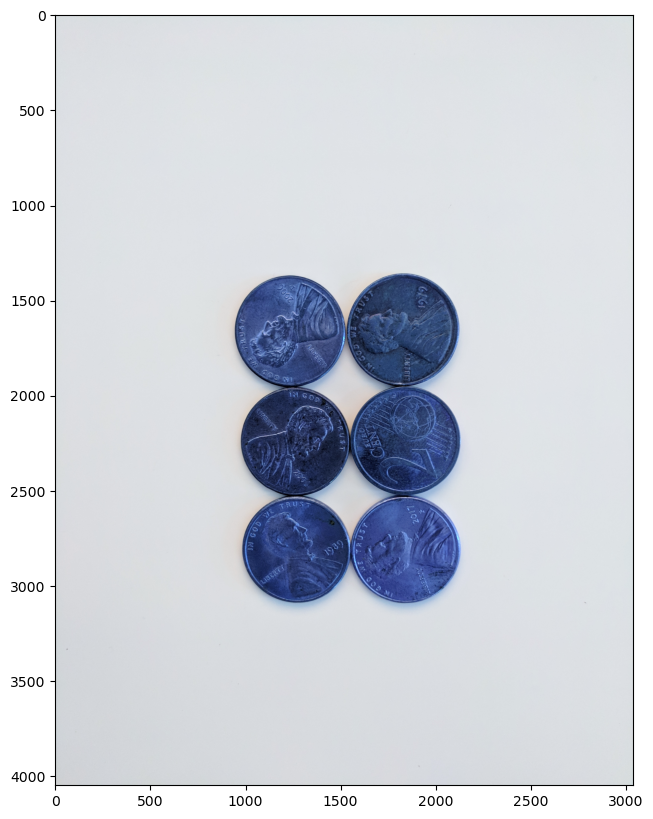

In [3]:
sep_coins = cv2.imread('../DATA/pennies.jpg')
display(sep_coins)

In [4]:
#Median Blur
#Convert to Gray Scale
#Binary Threshold
#Find Contours

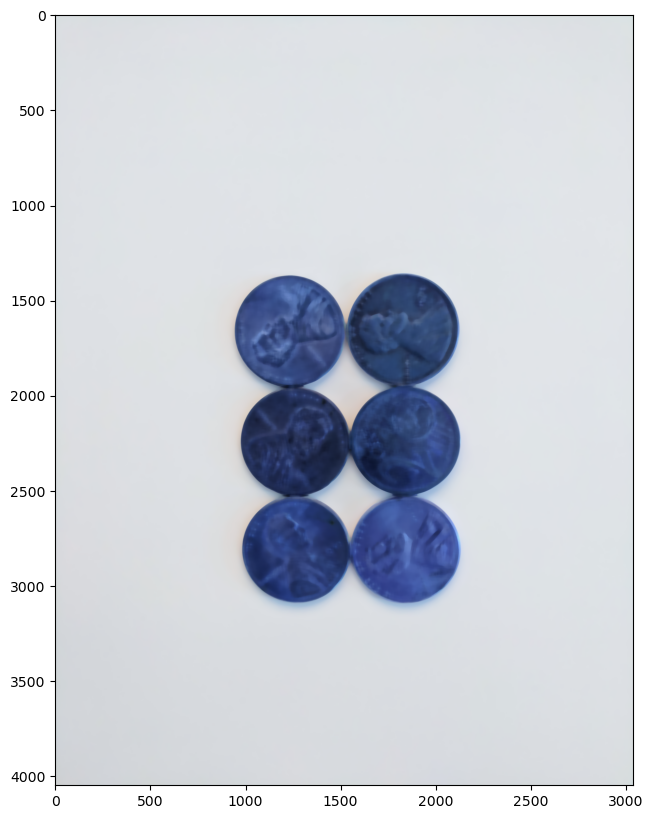

In [5]:
sep_blur = cv2.medianBlur(sep_coins, 25)
display(sep_blur)

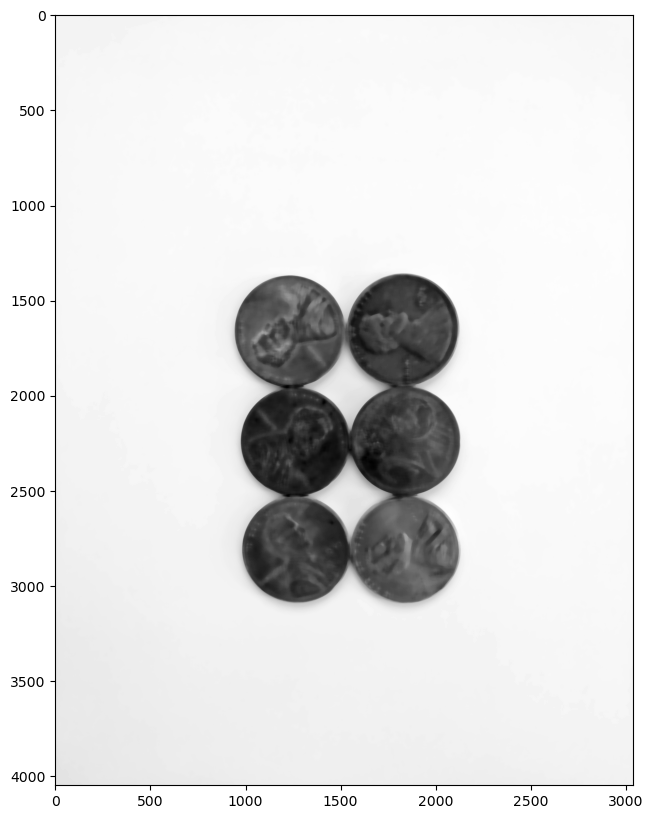

In [6]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)

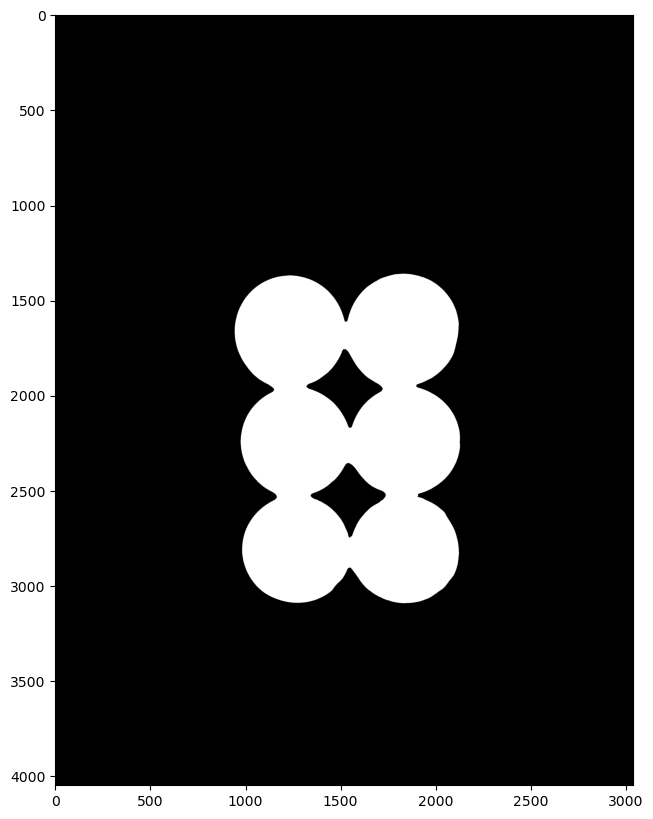

In [8]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)
display(sep_thresh)

In [9]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

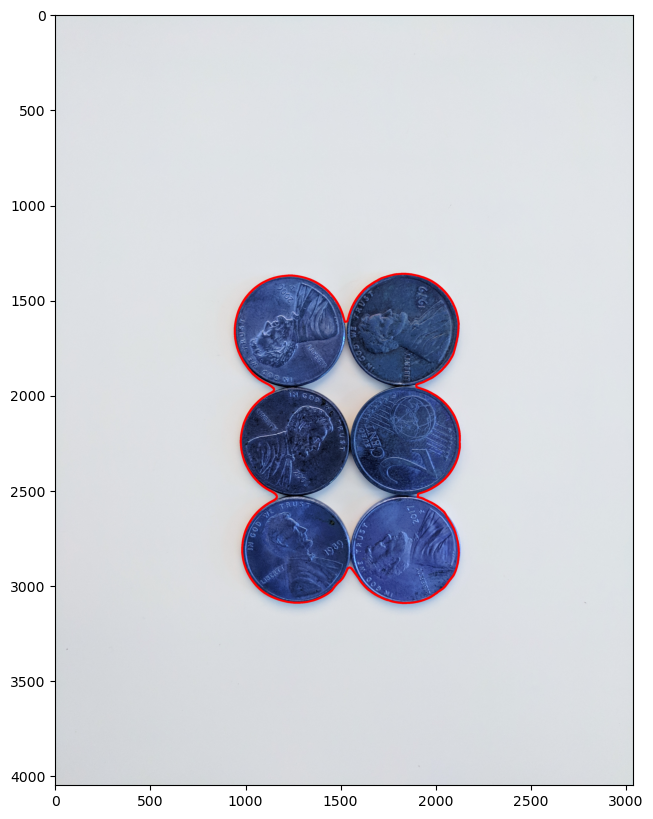

In [10]:
display(sep_coins)

In [11]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(gray_sep_coins, contours, i, (255,0,0), 10)

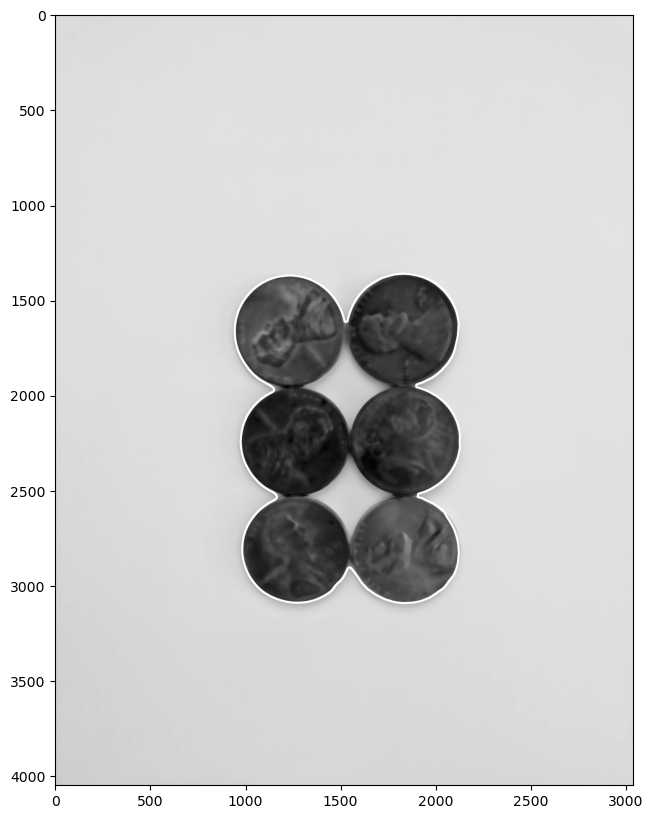

In [12]:
display(gray_sep_coins)

AS WE CAN SEE THERE IS NO GOOD WAY TO SEPARATE THESE PENNIES WITH THE ALGORITHMS WE HAVE LEARNED THIS FAR

INTRODUCING THE WATERSHED ALGORITHM:

In [13]:
img = cv2.imread('../DATA/pennies.jpg')

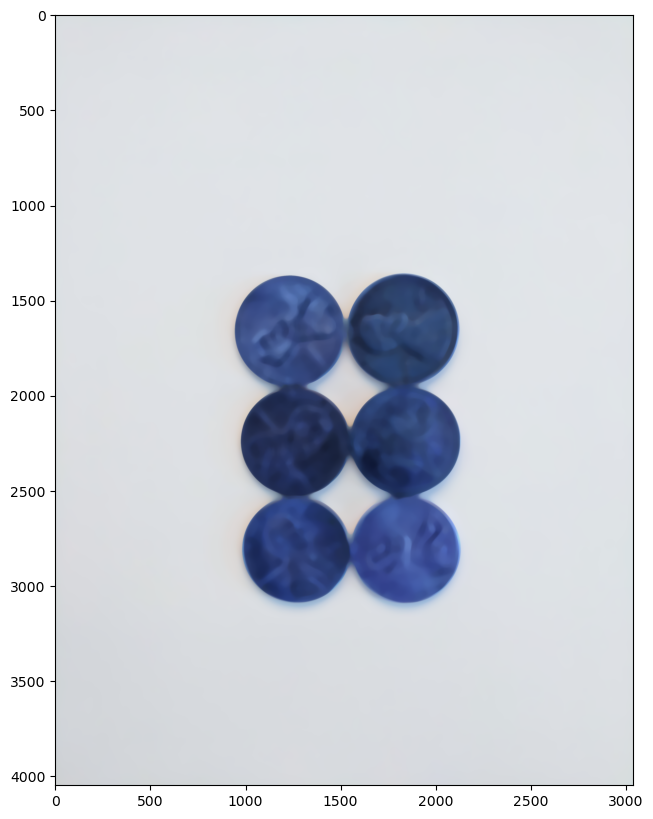

In [15]:
img = cv2.medianBlur(img, 35)
display(img)

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

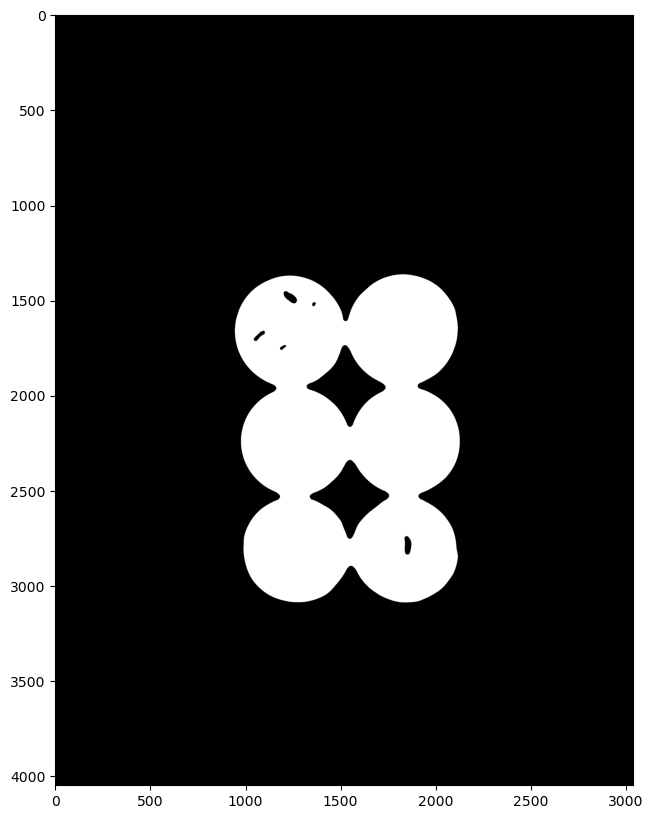

In [17]:
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
display(thresh)

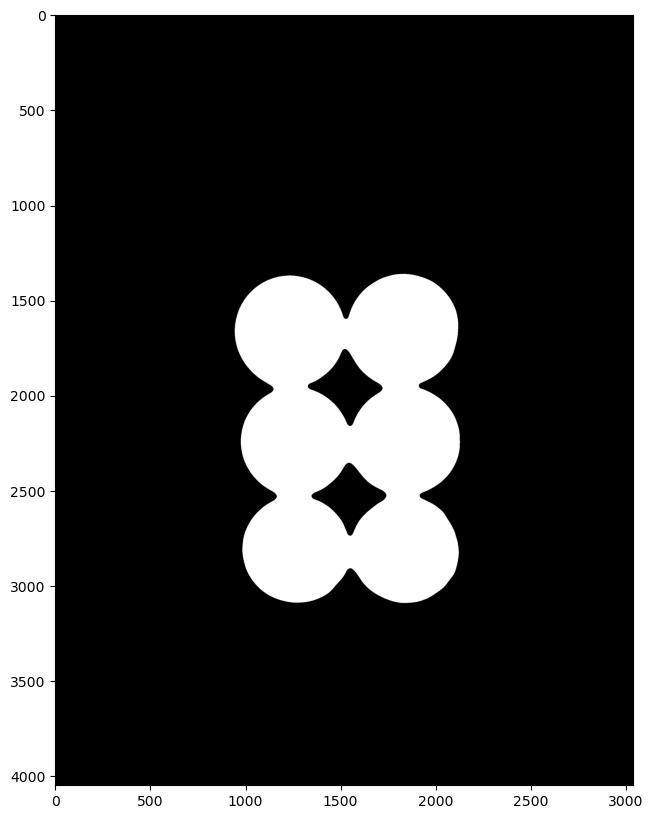

In [18]:
#We see that even thought the image was blurred we are still detecting features inside the pennies
#Try Otsu's method which works well with the watershed algorithm
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh)

In [19]:
#Noise Removal
kernel = np.ones((3,3), np.uint8)

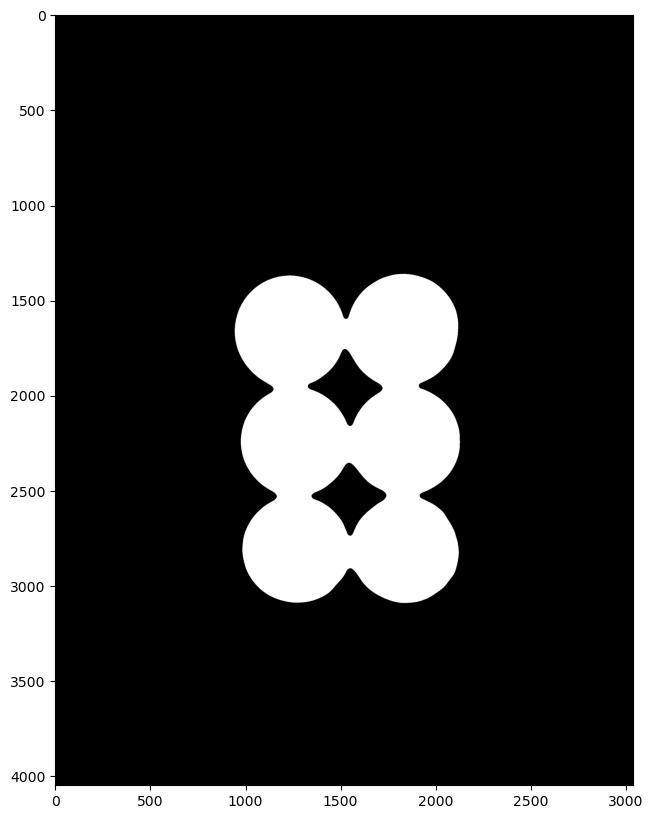

In [20]:
#Not great on this example but a common step in watershed algorithm for more complex images
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
display(opening)

In [24]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

In [21]:
#Perform Distance transform method this takes outside 0's in binary pixels and slowly increases as you get further away.
#This leaves us with a bright center that gets darker as it gets closer to the background in our threshold
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

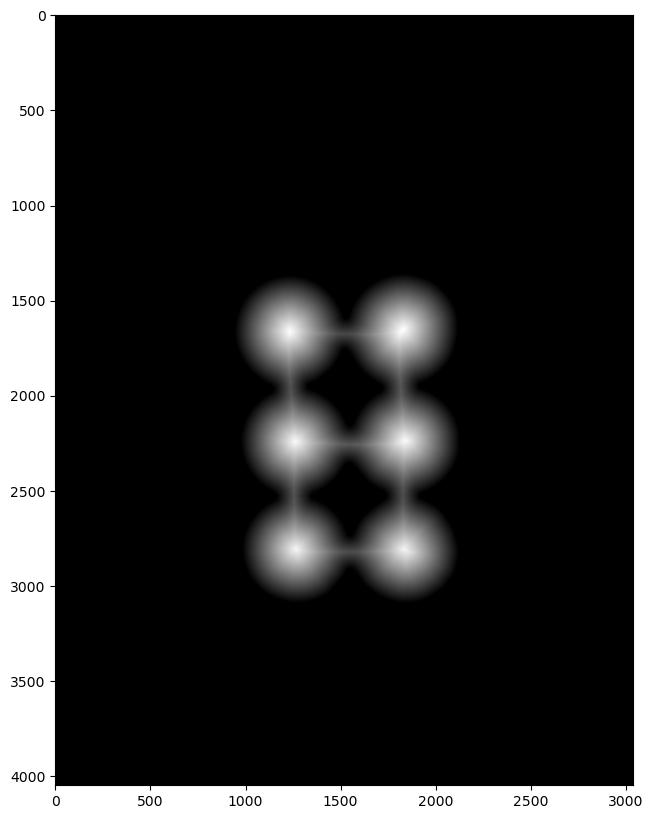

In [22]:
display(dist_transform)

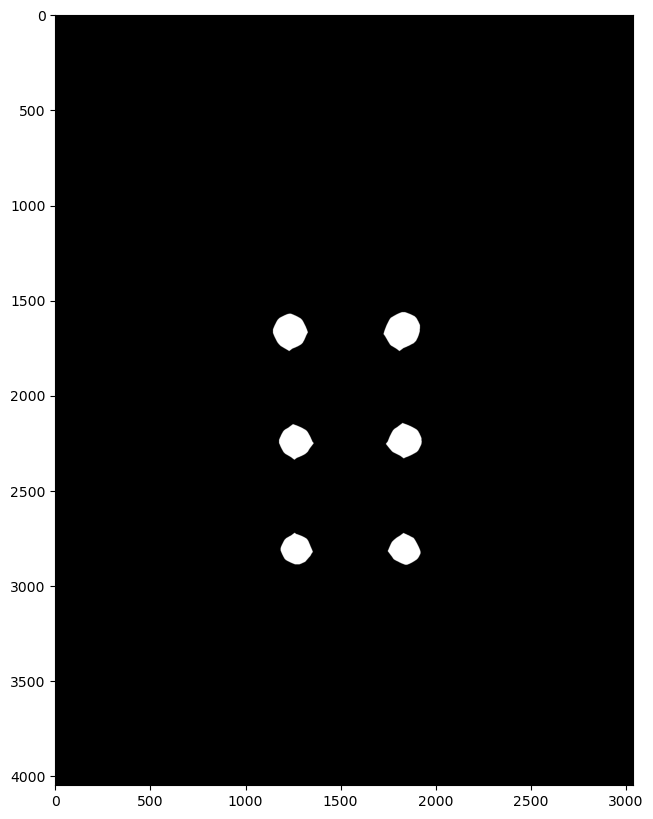

In [23]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
display(sure_fg)

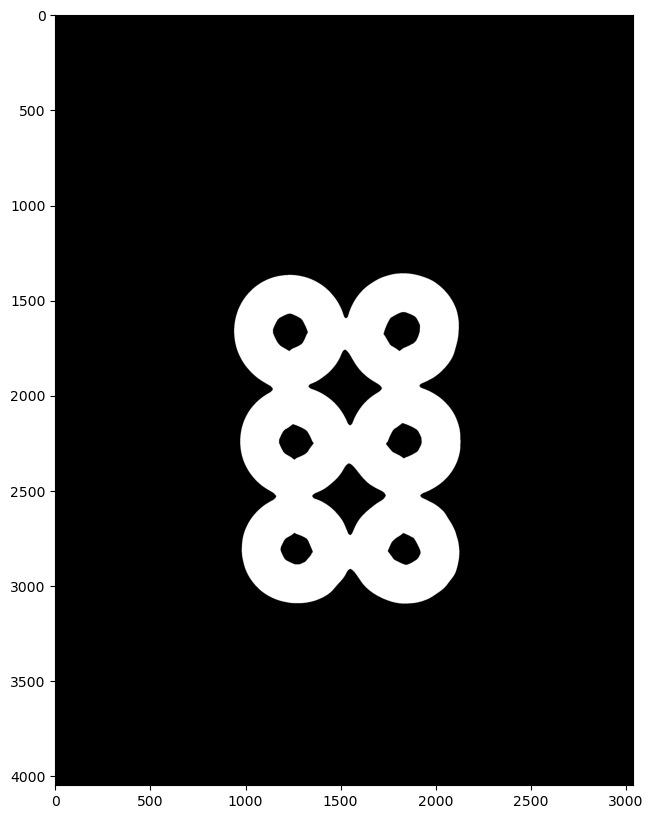

In [25]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
display(unknown)

In [26]:
ret, markers = cv2.connectedComponents(sure_fg)

In [27]:
markers = markers +1

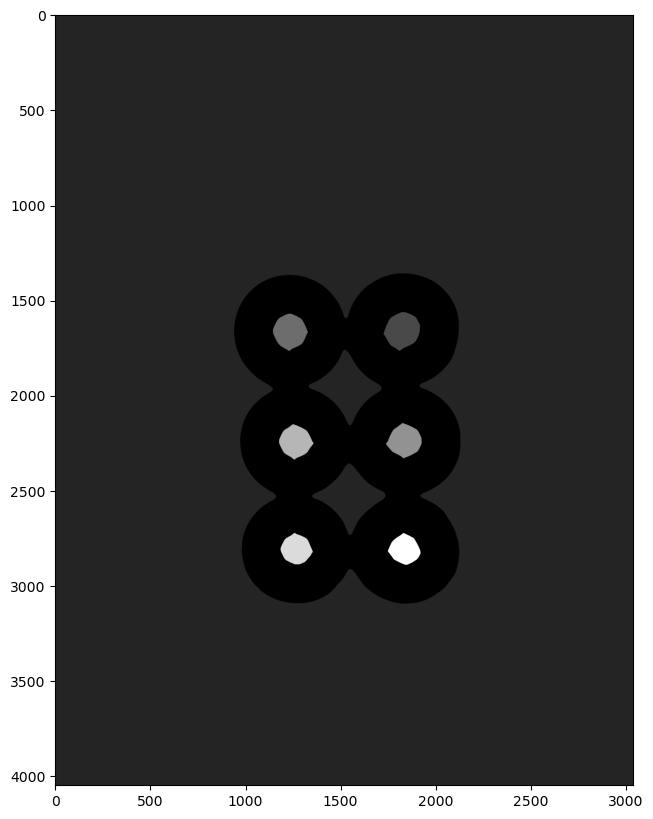

In [28]:
markers[unknown==255] = 0
display(markers)

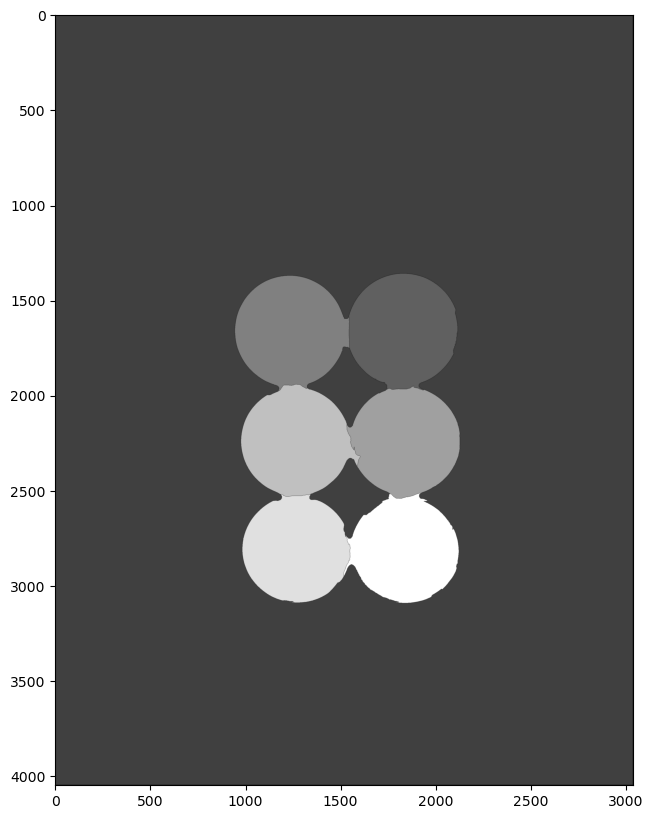

In [29]:
markers = cv2.watershed(img, markers)
display(markers)

In [30]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)